# IMPORTAR LIBRERÍAS

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")



✓ Librerías importadas correctamente


# CARGAR DATOS

In [2]:

# Cargar datasets
df_suicide = pd.read_csv("DATA\crude suicide rates.csv")
df_mental = pd.read_csv("DATA\share-with-alcohol-and-substance-use-disorders 1990-2016.csv")

print("\n📊 DATASETS CARGADOS:")
print(f"✓ Suicidio - Forma: {df_suicide.shape}")
print(f"✓ Salud Mental - Forma: {df_mental.shape}")
print("\n📋 Primeras filas de cada dataset:")
print("\nDataset Suicidio:")
print(df_suicide.head())
print("\nDataset Salud Mental:")
print(df_mental.head())


📊 DATASETS CARGADOS:
✓ Suicidio - Forma: (916, 8)
✓ Salud Mental - Forma: (6156, 4)

📋 Primeras filas de cada dataset:

Dataset Suicidio:
    Unnamed: 0 Unnamed: 1  \
0      Country       Year   
1  Afghanistan       2016   
2  Afghanistan       2015   
3  Afghanistan       2010   
4  Afghanistan       2005   

  Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease  \
0                                         Both sexes                                                                                              
1                                               29.8                                                                                              
2                                               29.8                                                                                              
3                                               31.7                                              

# EXPLORACIÓN INICIAL 
 Análisis de estructura y valores nulos

In [3]:
print("="*100)
print("PASO 2.1: EXPLORACIÓN INICIAL DE DATOS")
print("="*100)

print("\n📊 DATASET SUICIDIO:")
print(f"Forma: {df_suicide.shape} (filas, columnas)")
print(f"\n🔍 Tipos de datos:")
print(df_suicide.dtypes)
print(f"\n❓ Valores nulos por columna:")
print(df_suicide.isnull().sum())
print(f"\n📈 Estadísticas descriptivas:")
print(df_suicide.describe())

print("\n" + "="*100)
print("\n📊 DATASET SALUD MENTAL:")
print(f"Forma: {df_mental.shape} (filas, columnas)")
print(f"\n🔍 Tipos de datos:")
print(df_mental.dtypes)
print(f"\n❓ Valores nulos por columna:")
print(df_mental.isnull().sum())
print(f"\n📈 Estadísticas descriptivas:")
print(df_mental.describe())


PASO 2.1: EXPLORACIÓN INICIAL DE DATOS

📊 DATASET SUICIDIO:
Forma: (916, 8) (filas, columnas)

🔍 Tipos de datos:
Unnamed: 0                                                                                                                                         object
Unnamed: 1                                                                                                                                         object
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease      object
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.1    object
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.2    object
Crude suicide rates (per 100 000 population)                                                                         

# LIMPIEZA Y PREPROCESAMIENTO 

 Renombrar columnas y eliminar nulos

In [4]:
print("\n" + "="*100)
print("LIMPIEZA Y PREPROCESAMIENTO DE DATOS")
print("="*100)

# Limpiar nombres de columnas
df_suicide.columns = df_suicide.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
df_mental.columns = df_mental.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

print(f"\n✓ Columnas renombradas en Dataset Suicidio:")
print(df_suicide.columns.tolist())

print(f"\n✓ Columnas renombradas en Dataset Salud Mental:")
print(df_mental.columns.tolist())

# Verificar valores nulos
print(f"\n❓ Valores nulos ANTES de eliminar:")
print(f"Suicidio: {df_suicide.isnull().sum().sum()}")
print(f"Mental: {df_mental.isnull().sum().sum()}")

# Eliminar valores nulos
df_suicide_clean = df_suicide.dropna()
df_mental_clean = df_mental.dropna()

print(f"\n✓ Valores nulos DESPUÉS de eliminar:")
print(f"Suicidio: {df_suicide_clean.shape[0]} registros (antes: {df_suicide.shape[0]})")
print(f"Mental: {df_mental_clean.shape[0]} registros (antes: {df_mental.shape[0]})")

# Usar el dataset de suicidio como principal
df = df_suicide_clean.copy()

print(f"\n✓ Dataset principal: {df.shape}")
print(f"\n💡 ¿Por qué se hizo esto?")
print(f"  - Limpiar nombres de columnas facilita el manejo")
print(f"  - Eliminar nulos evita errores en cálculos posteriores")
print(f"  - Dataset consistente sin valores faltantes")


LIMPIEZA Y PREPROCESAMIENTO DE DATOS

✓ Columnas renombradas en Dataset Suicidio:
['unnamed:_0', 'unnamed:_1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.2', 'crude_suicide_rates_(per_100_000_population)', 'crude_suicide_rates_(per_100_000_population).1', 'crude_suicide_rates_(per_100_000_population).2']

✓ Columnas renombradas en Dataset Salud Mental:
['entity', 'code', 'year', 'prevalence___alcohol_and_substance_use_disorders:_both_(age_standardized_percent)_(%)']

❓ Valores nulos ANTES de eliminar:
Suicidio: 0
Mental: 864

✓ Valores nulos DESPUÉS de eliminar:
Suicidio: 916 registros (antes: 916)
M

In [5]:
# ==================== CELDA DE DIAGNÓSTICO ====================
# Ejecuta ESTA CELDA PRIMERO para verificar el problema

print("="*100)
print("🔍 DIAGNÓSTICO: Verificar variables")
print("="*100)

# 1. Verificar que df existe
print(f"\n1. ¿Existe df?")
print(f"   {type(df)}")
print(f"   Forma: {df.shape}")

# 2. Verificar todas las columnas
print(f"\n2. Todas las columnas del dataframe:")
print(df.columns.tolist())

# 3. Verificar tipos de datos
print(f"\n3. Tipos de datos:")
print(df.dtypes)

# 4. Seleccionar columnas numéricas correctamente
print(f"\n4. Seleccionando columnas numéricas:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"   Columnas numéricas encontradas: {len(numeric_cols)}")
print(f"   Lista: {numeric_cols}")

# 5. Seleccionar columnas categóricas
print(f"\n5. Seleccionando columnas categóricas:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"   Columnas categóricas encontradas: {len(categorical_cols)}")
print(f"   Lista: {categorical_cols}")

# 6. Verificar si hay datos vacíos
print(f"\n6. Valores nulos por columna:")
print(df.isnull().sum())

# 7. Mostrar primeras filas
print(f"\n7. Primeras filas del dataframe:")
print(df.head())

print("\n" + "="*100)
print("✓ DIAGNÓSTICO COMPLETADO")
print("="*100)
print("\n💡 Si numeric_cols está vacío:")
print("   → Asegúrate de haber ejecutado celdas previas")
print("   → Verifica que df se cargó correctamente")
print("   → Revisa que las columnas tienen tipos numéricos")

🔍 DIAGNÓSTICO: Verificar variables

1. ¿Existe df?
   <class 'pandas.core.frame.DataFrame'>
   Forma: (916, 8)

2. Todas las columnas del dataframe:
['unnamed:_0', 'unnamed:_1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.2', 'crude_suicide_rates_(per_100_000_population)', 'crude_suicide_rates_(per_100_000_population).1', 'crude_suicide_rates_(per_100_000_population).2']

3. Tipos de datos:
unnamed:_0                                                                                                                                         object
unnamed:_1                                                   

In [6]:
# ====== CELDA NUEVA: CONVERTIR COLUMNAS A NUMÉRICAS ======
# Copia y ejecuta ESTO en una nueva celda

import pandas as pd
import numpy as np

# 1. Convertir a numéricas
numeric_cols_to_convert = [
    'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease',
    'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1',
    'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.2',
    'crude_suicide_rates_(per_100_000_population)',
    'crude_suicide_rates_(per_100_000_population).1',
    'crude_suicide_rates_(per_100_000_population).2'
]

for col in numeric_cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Eliminar nulos que creó la conversión
df = df.dropna()

# 3. Verificar
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"✓ Columnas numéricas: {len(numeric_cols)}")
print(f"  {numeric_cols}")
print(f"✓ Total registros: {len(df)}")

✓ Columnas numéricas: 6
  ['probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.2', 'crude_suicide_rates_(per_100_000_population)', 'crude_suicide_rates_(per_100_000_population).1', 'crude_suicide_rates_(per_100_000_population).2']
✓ Total registros: 915


#  IDENTIFICAR VARIABLES
 Separar variables numéricas y categóricas

In [7]:

print("\n" + "="*100)
print("PASO 2.2: ANÁLISIS UNIVARIANTE")
print("="*100)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📈 Variables Numéricas ({len(numeric_cols)}):")
print(numeric_cols)

print(f"\n📝 Variables Categóricas ({len(categorical_cols)}):")
print(categorical_cols)




PASO 2.2: ANÁLISIS UNIVARIANTE

📈 Variables Numéricas (6):
['probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.2', 'crude_suicide_rates_(per_100_000_population)', 'crude_suicide_rates_(per_100_000_population).1', 'crude_suicide_rates_(per_100_000_population).2']

📝 Variables Categóricas (2):
['unnamed:_0', 'unnamed:_1']


#  ESTADÍSTICAS UNIVARIANTES 
Análisis detallado de cada variable

In [8]:
print("\n" + "-"*100)
print("ESTADÍSTICAS DETALLADAS - VARIABLES NUMÉRICAS")
print("-"*100)

for col in numeric_cols:
    print(f"\n📊 {col.upper()}:")
    print(f"  Media:         {df[col].mean():.4f}")
    print(f"  Mediana:       {df[col].median():.4f}")
    print(f"  Desv. Estándar: {df[col].std():.4f}")
    print(f"  Mínimo:        {df[col].min():.4f}")
    print(f"  Máximo:        {df[col].max():.4f}")
    print(f"  Q1 (25%):      {df[col].quantile(0.25):.4f}")
    print(f"  Q3 (75%):      {df[col].quantile(0.75):.4f}")
    print(f"  Rango IQR:     {df[col].quantile(0.75) - df[col].quantile(0.25):.4f}")

print("\n" + "-"*100)
print("ESTADÍSTICAS - VARIABLES CATEGÓRICAS")
print("-"*100)

for col in categorical_cols:
    print(f"\n📝 {col.upper()} - Frecuencias:")
    print(df[col].value_counts().head(10))




----------------------------------------------------------------------------------------------------
ESTADÍSTICAS DETALLADAS - VARIABLES NUMÉRICAS
----------------------------------------------------------------------------------------------------

📊 PROBABILITY_(%)_OF_DYING_BETWEEN_AGE_30_AND_EXACT_AGE_70_FROM_ANY_OF_CARDIOVASCULAR_DISEASE,_CANCER,_DIABETES,_OR_CHRONIC_RESPIRATORY_DISEASE:
  Media:         20.5849
  Mediana:       20.8000
  Desv. Estándar: 5.9529
  Mínimo:        7.8000
  Máximo:        39.1000
  Q1 (25%):      16.4000
  Q3 (75%):      24.7000
  Rango IQR:     8.3000

📊 PROBABILITY_(%)_OF_DYING_BETWEEN_AGE_30_AND_EXACT_AGE_70_FROM_ANY_OF_CARDIOVASCULAR_DISEASE,_CANCER,_DIABETES,_OR_CHRONIC_RESPIRATORY_DISEASE.1:
  Media:         23.7097
  Mediana:       22.7000
  Desv. Estándar: 7.3601
  Mínimo:        9.9000
  Máximo:        51.7000
  Q1 (25%):      18.4000
  Q3 (75%):      28.4000
  Rango IQR:     10.0000

📊 PROBABILITY_(%)_OF_DYING_BETWEEN_AGE_30_AND_EXACT_AGE_70_

# VISUALIZAR DISTRIBUCIONES 
Histogramas para variables numéricas

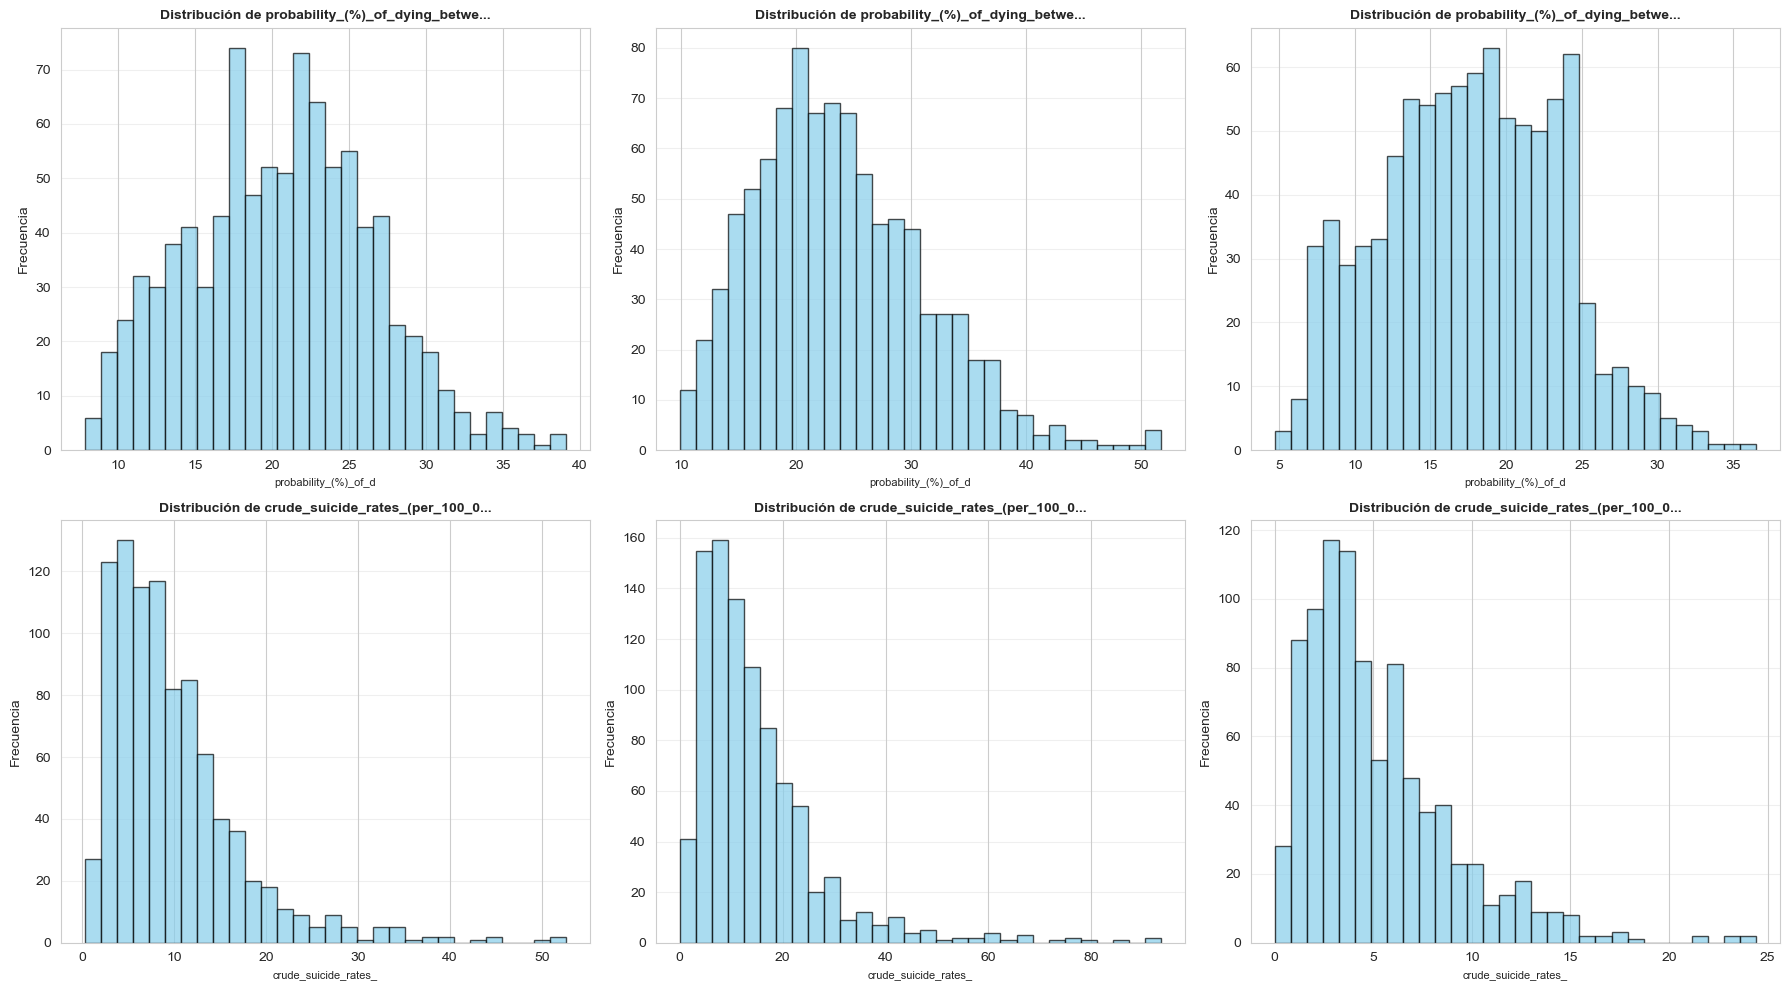

✓ Gráfica guardada


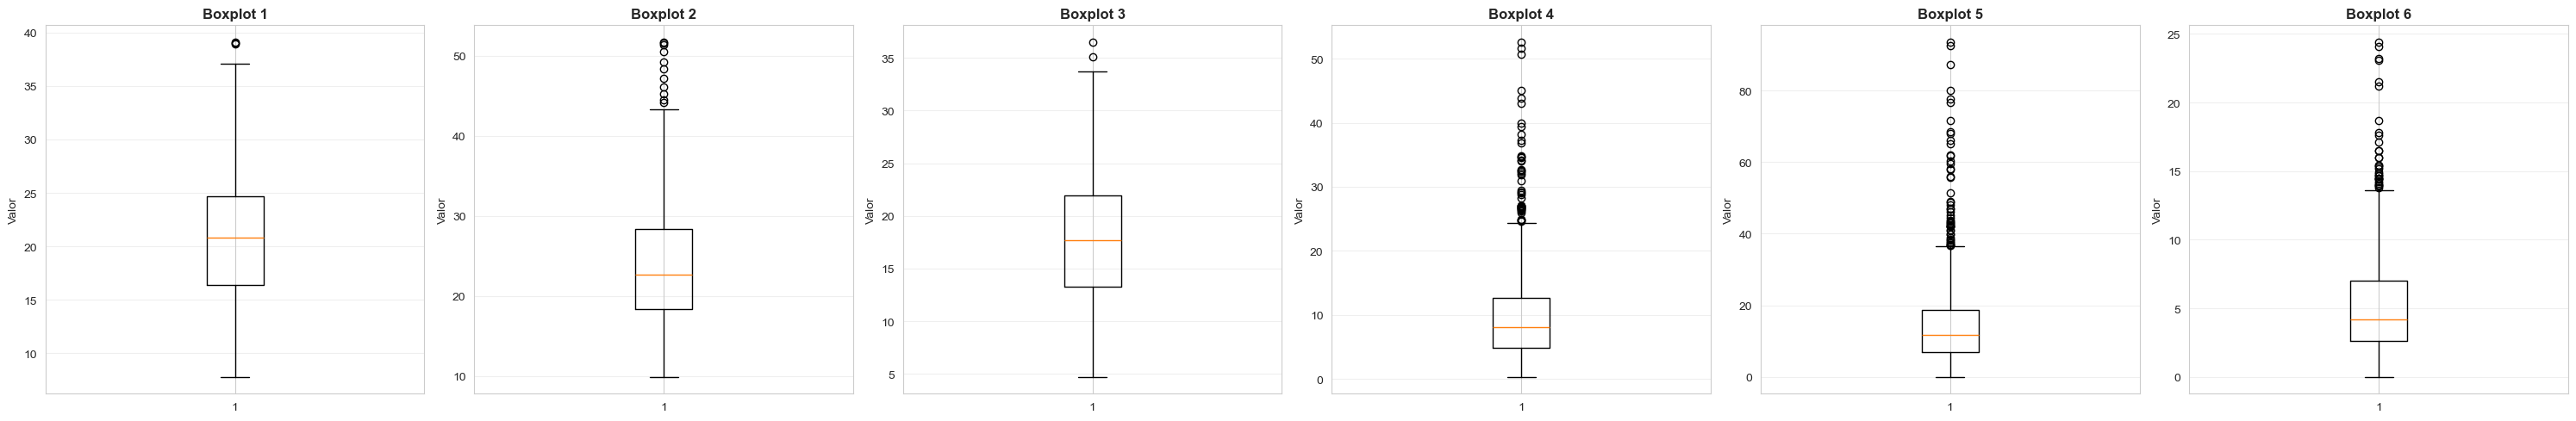

✓ Boxplots guardados

ESTADÍSTICAS UNIVARIANTES

probability_(%)_of_dying_between_age_30_and_exact_...
  Media: 20.58
  Mediana: 20.80
  Desv.Est: 5.95
  Min: 7.80 | Max: 39.10
  Outliers: 3 (0.3%)

probability_(%)_of_dying_between_age_30_and_exact_...
  Media: 23.71
  Mediana: 22.70
  Desv.Est: 7.36
  Min: 9.90 | Max: 51.70
  Outliers: 11 (1.2%)

probability_(%)_of_dying_between_age_30_and_exact_...
  Media: 17.64
  Mediana: 17.70
  Desv.Est: 5.85
  Min: 4.70 | Max: 36.50
  Outliers: 2 (0.2%)

crude_suicide_rates_(per_100_000_population)...
  Media: 9.94
  Mediana: 8.10
  Desv.Est: 7.27
  Min: 0.30 | Max: 52.60
  Outliers: 43 (4.7%)

crude_suicide_rates_(per_100_000_population).1...
  Media: 14.80
  Mediana: 11.70
  Desv.Est: 12.24
  Min: 0.00 | Max: 93.50
  Outliers: 50 (5.5%)

crude_suicide_rates_(per_100_000_population).2...
  Media: 5.23
  Mediana: 4.20
  Desv.Est: 3.75
  Min: 0.00 | Max: 24.40
  Outliers: 32 (3.5%)


In [9]:
# ====== HISTOGRAMAS ======
import matplotlib.pyplot as plt

n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Distribución de {col[:30]}...', fontweight='bold', fontsize=10)
    axes[idx].set_xlabel(col[:20], fontsize=8)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('results/01_distribuciones.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Gráfica guardada")


# ====== BOXPLOTS ======
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5*len(numeric_cols), 5))
if len(numeric_cols) == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(f'Boxplot {idx+1}', fontweight='bold')
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/02_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Boxplots guardados")


# ====== ESTADÍSTICAS ======
print("\n" + "="*80)
print("ESTADÍSTICAS UNIVARIANTES")
print("="*80)

for col in numeric_cols:
    print(f"\n{col[:50]}...")
    print(f"  Media: {df[col].mean():.2f}")
    print(f"  Mediana: {df[col].median():.2f}")
    print(f"  Desv.Est: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f} | Max: {df[col].max():.2f}")
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).sum()
    print(f"  Outliers: {outliers} ({outliers/len(df)*100:.1f}%)")

Filtrado de Outliers (IQR)

In [10]:
print("\n" + "="*80)
print("PASO 3: FILTRADO DE OUTLIERS (IQR)")
print("="*80)

registros_antes = len(df)
print(f"Registros antes del filtrado: {registros_antes}")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f'  - {col[:40]}...: {outliers_count} outliers detectados.')

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

registros_despues = len(df)
print(f"\nRegistros después del filtrado: {registros_despues}")
print(f"Registros eliminados: {registros_antes - registros_despues}")
print(f"Porcentaje de datos conservados: {registros_despues / registros_antes * 100:.2f}%")


PASO 3: FILTRADO DE OUTLIERS (IQR)
Registros antes del filtrado: 915
  - probability_(%)_of_dying_between_age_30_...: 3 outliers detectados.
  - probability_(%)_of_dying_between_age_30_...: 9 outliers detectados.
  - probability_(%)_of_dying_between_age_30_...: 2 outliers detectados.
  - crude_suicide_rates_(per_100_000_populat...: 35 outliers detectados.
  - crude_suicide_rates_(per_100_000_populat...: 13 outliers detectados.
  - crude_suicide_rates_(per_100_000_populat...: 28 outliers detectados.

Registros después del filtrado: 825
Registros eliminados: 90
Porcentaje de datos conservados: 90.16%


Variable Objetivo y Análisis Bivariante


PASO 4: DEFINICIÓN DE VARIABLE OBJETIVO
✓ Variable objetivo de regresión ('target_reg') creada a partir de 'crude_suicide_rates_(per_100_000_population)'.
✓ Variable objetivo de clasificación ('target_class') creada.
  - Tasa de suicidio > 7.50 -> Clase 1 (Alta)
  - Tasa de suicidio <= 7.50 -> Clase 0 (Baja)

Distribución de la variable de clasificación:
target_class
0    414
1    411
Name: count, dtype: int64

PASO 5: ANÁLISIS BIVARIANTE (MATRIZ DE CORRELACIÓN)


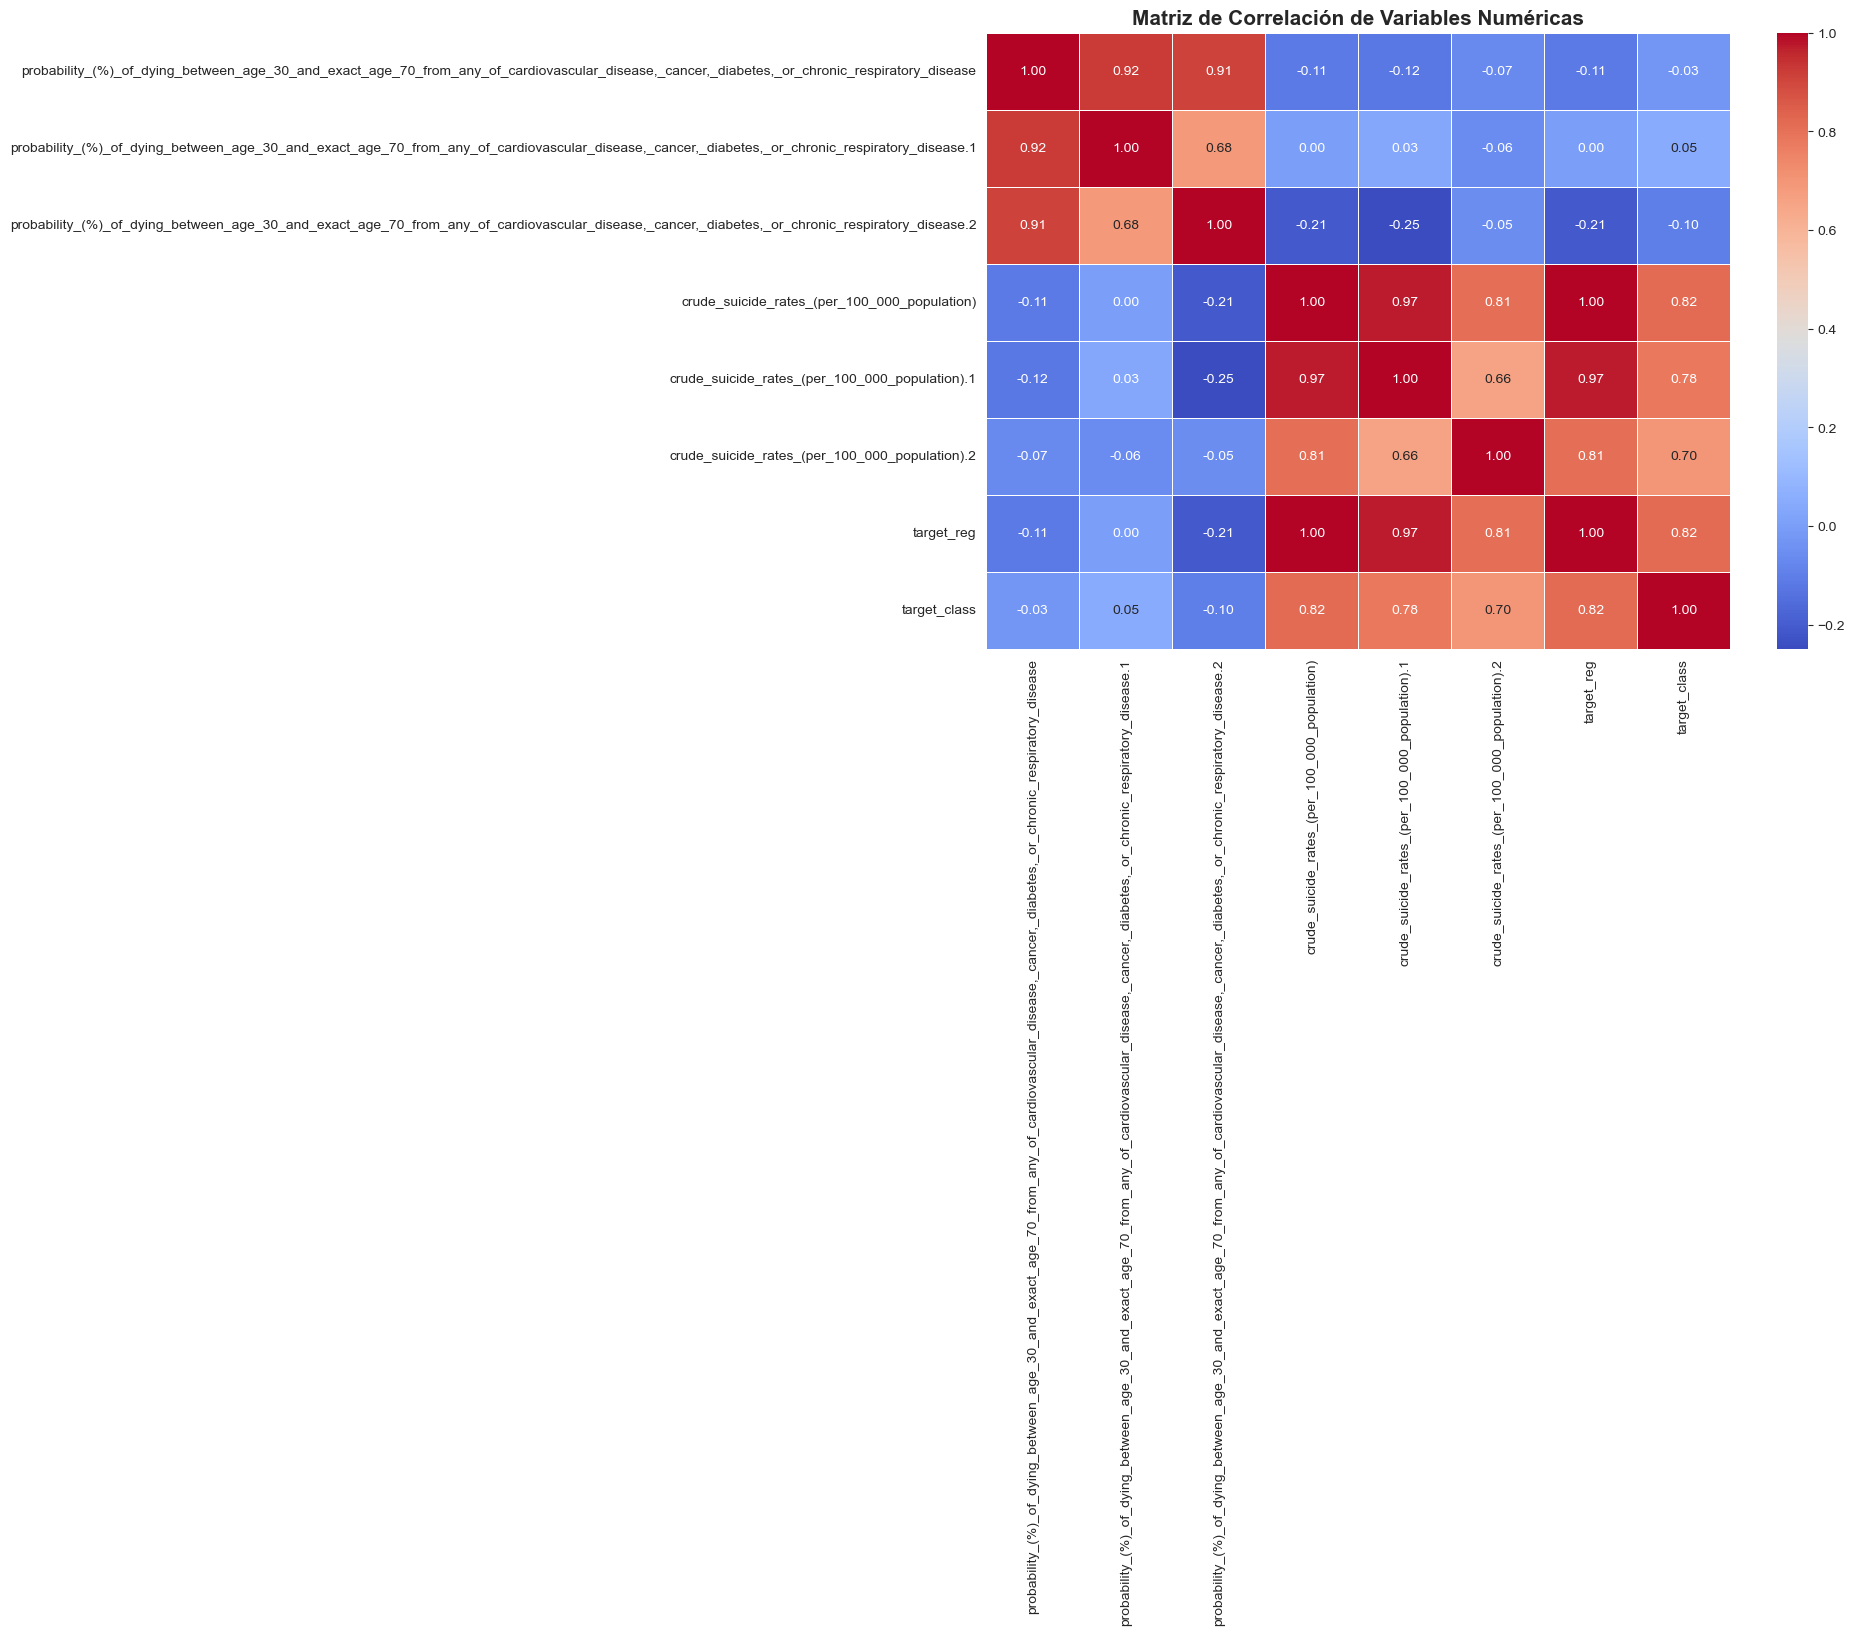

In [11]:
print("\n" + "="*80)
print("PASO 4: DEFINICIÓN DE VARIABLE OBJETIVO")
print("="*80)

# 1. Variable objetivo para Regresión
target_reg_col = 'crude_suicide_rates_(per_100_000_population)'
df['target_reg'] = df[target_reg_col]
print(f"✓ Variable objetivo de regresión ('target_reg') creada a partir de '{target_reg_col}'.")

# 2. Variable objetivo para Clasificación
median_suicide_rate = df['target_reg'].median()
df['target_class'] = (df['target_reg'] > median_suicide_rate).astype(int) # 1 para 'Alta', 0 para 'Baja'
print(f"✓ Variable objetivo de clasificación ('target_class') creada.")
print(f"  - Tasa de suicidio > {median_suicide_rate:.2f} -> Clase 1 (Alta)")
print(f"  - Tasa de suicidio <= {median_suicide_rate:.2f} -> Clase 0 (Baja)")
print("\nDistribución de la variable de clasificación:")
print(df['target_class'].value_counts())

print("\n" + "="*80)
print("PASO 5: ANÁLISIS BIVARIANTE (MATRIZ DE CORRELACIÓN)")
print("="*80)

# Calcular matriz de correlación solo con columnas numéricas
numeric_cols_for_corr = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols_for_corr].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=15, fontweight='bold')
plt.show()

División Train/Test y Guardado

In [12]:
import os
from sklearn.model_selection import train_test_split

print("\n" + "="*80)
print("PASO 6: DIVISIÓN TRAIN/TEST (80/20 ESTRATIFICADO)")
print("="*80)

# Definir features (X) y targets (y)
features = df.drop(columns=['target_reg', 'target_class', target_reg_col])
targets = df[['target_reg', 'target_class']]

# División estratificada usando la variable de clasificación
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    targets, 
    test_size=0.2, 
    random_state=42, 
    stratify=targets['target_class']
)

print("✓ Datos divididos en conjuntos de entrenamiento y prueba.")
print(f"  - Tamaño de X_train: {X_train.shape}")
print(f"  - Tamaño de X_test: {X_test.shape}")
print(f"  - Tamaño de y_train: {y_train.shape}")
print(f"  - Tamaño de y_test: {y_test.shape}")

print("\n" + "="*80)
print("PASO 7: GUARDADO DE ARCHIVOS PROCESADOS")
print("="*80)

# Crear directorio si no existe
output_dir = 'processed_data'
os.makedirs(output_dir, exist_ok=True)
print(f"✓ Directorio '{output_dir}' asegurado.")

# Guardar los dataframes
X_train.to_csv(f'{output_dir}/X_train.csv', index=False)
X_test.to_csv(f'{output_dir}/X_test.csv', index=False)
y_train.to_csv(f'{output_dir}/y_train.csv', index=False)
y_test.to_csv(f'{output_dir}/y_test.csv', index=False)

print("✓ Archivos guardados exitosamente en la carpeta 'processed_data'.")



PASO 6: DIVISIÓN TRAIN/TEST (80/20 ESTRATIFICADO)
✓ Datos divididos en conjuntos de entrenamiento y prueba.
  - Tamaño de X_train: (660, 7)
  - Tamaño de X_test: (165, 7)
  - Tamaño de y_train: (660, 2)
  - Tamaño de y_test: (165, 2)

PASO 7: GUARDADO DE ARCHIVOS PROCESADOS
✓ Directorio 'processed_data' asegurado.
✓ Archivos guardados exitosamente en la carpeta 'processed_data'.
